In [1]:
from dwellml import freq, vehicle, load_dataset as load, density_cluster as dc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import mplleaflet as mpl

In [2]:
df = load.read_data("dataset\Dwell_Dataset.csv")

Preprocessing Data...: 100%|████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 403.18it/s]


In [3]:
df.head()

,Device_ID,Latitude,Longitude,Start_time,End_time,Category,Gender,Age,Date,Time_Weight,End_Datetime,Weekday,Week_Number,Month_Name,Month_Number
0,1,41.879604,-87.633664,08:00:00,08:10:00,Fast Food,Male,25,2020-10-05,0.490,2020-10-05 08:00:00,Monday,1,October,10
1,1,41.877677,-87.634251,08:15:00,08:20:00,Parking,Male,25,2020-10-05,0.500,2020-10-05 08:15:00,Monday,1,October,10
2,1,41.880653,-87.636480,08:30:00,12:00:00,Work,Male,25,2020-10-05,0.720,2020-10-05 08:30:00,Monday,1,October,10
3,1,41.897865,-87.630874,17:30:00,23:59:00,Home,Male,25,2020-10-05,1.439,2020-10-05 17:30:00,Monday,1,October,10
4,2,41.879604,-87.633664,07:30:00,08:30:00,Fast Food,Female,27,2020-10-05,0.510,2020-10-05 07:30:00,Monday,1,October,10


# Layer 1
## Frequency - Weekly & Monthly 

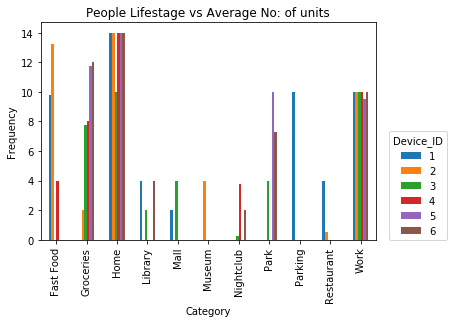

In [4]:
temp_df = df.groupby(by = ['Week_Number','Device_ID','Category'])['Device_ID'].count().unstack('Device_ID').reset_index()
temp_df = temp_df.groupby(['Category']).mean()
del temp_df['Week_Number']
temp_df.plot(kind='bar')
# Plot the bar graph
plt.rcParams['figure.figsize'] = (20, 20)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0, title = "Device_ID")
plt.title('People Lifestage vs Average No: of units')  
plt.xlabel('Category')  
plt.ylabel('Frequency')
plt.show()

In [5]:
freq.weekly_frequency(df,1)

,Category,Frequency of visits
0,Fast Food,9.75
1,Groceries,0.00
2,Home,14.00
3,Library,4.00
4,Mall,2.00
5,Museum,0.00
6,Nightclub,0.00
7,Park,0.00
8,Parking,10.00
9,Restaurant,4.00


In [6]:
freq.weekly_frequency(df,7)

Device_ID not found


In [7]:
help(freq.weekly_frequency)

Help on function weekly_frequency in module dwellml.freq.lib:

weekly_frequency(dataset, device_id)
    The function calculates the frequency of visits on a weekly basis 
    for each category in the dataset. The frequency will be calculated
    for a specific Device_ID
    
    Parameters
    ----------
    dataset   : pandas.Series/pandas.Dataframe
    device_id : int
    
    Returns
    -------
    freq_count: pandas.Dataframe



In [8]:
freq.monthly_frequency(df,1)

,Category,Frequency of visits
0,Fast Food,19.5
1,Groceries,0.0
2,Home,28.0
3,Library,8.0
4,Mall,4.0
5,Museum,0.0
6,Nightclub,0.0
7,Park,0.0
8,Parking,20.0
9,Restaurant,8.0


In [9]:
freq.monthly_frequency(df,7)

Device_ID not found


# Layer 2
## Mode of Transport

In [10]:
Lat1 = 41.879885
Lon1 = -87.632588
Lat2 = 41.87826
Lon2 = -87.634264
stay_duration = 274


vehicle.get_vehicle(Lat1,Lon1,Lat2,Lon2,stay_duration)

'WALK'

# Layer 3
## Frequency Clustering Approach

In [11]:
max_distance = 0.05

min_customers = 25

hot_spots, df = dc.get_hot_spots(max_distance ,min_customers,df)

Number of clusters: 8


## Plotting the clusters

In [12]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

## setting the color scale
# color_scale = np.log(hot_spots[2])
color_scale = hot_spots[2]
rng = np.random.RandomState(0)

colors = rng.rand(len(hot_spots[0]))

## making a scatter plot
plt.scatter(hot_spots[0], hot_spots[1],s=hot_spots[2],c=colors,cmap=cm.cool)

## displaying the Leaflet
# mpl.show()     # to open in a new tab
mpl.display()    # inline map

C:\Users\Gokul\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
